In [3]:
# Import libraries
import zipfile
import os
import cv2
import numpy as np

# Path to the uploaded zip file and extraction path
zip_path = '/content/faces.zip'  # Update with the actual path to the file
extraction_path = '/content/faces'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

In [4]:
# Load images from extracted folder
image_folder_path = os.path.join(extraction_path, 'faces')
target_size = (64,64)
image_data = []

# Read, resize, and flatten images
for image_file in os.listdir(image_folder_path):
    image_path = os.path.join(image_folder_path, image_file)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img_resized = cv2.resize(img, target_size)
        image_data.append(img_resized.flatten())

# Create data matrix
data_matrix = np.array(image_data)  # Shape should be (number of images, flattened size)
print("Data matrix shape:", data_matrix.shape)


Data matrix shape: (39, 4096)


In [5]:
# Step 1: Calculate the Covariance Matrix
mean_vector = np.mean(data_matrix, axis=0)  # Mean of each feature
centered_data = data_matrix - mean_vector   # Center the data by subtracting the mean
cov_matrix = np.cov(centered_data, rowvar=False)  # Covariance matrix

# Step 2: Eigenvalue Decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  # Compute eigenvalues and eigenvectors
sorted_idx = np.argsort(eigenvalues)[::-1]             # Sort eigenvalues in descending order
eigenvalues = eigenvalues[sorted_idx]                   # Sort eigenvalues
eigenvectors = eigenvectors[:, sorted_idx]              # Sort eigenvectors accordingly

# Step 3: Select the Top k Eigenvectors
k = 20  # Number of principal components to keep (adjustable)
top_eigenvectors = eigenvectors[:, :k]

# Step 4: Project Data to Lower Dimension
Yt = centered_data @ top_eigenvectors  # Projection onto top k eigenvectors
print("Shape of reduced data (Yt):", Yt.shape)  # Should be (number_of_images, k)


Shape of reduced data (Yt): (39, 20)


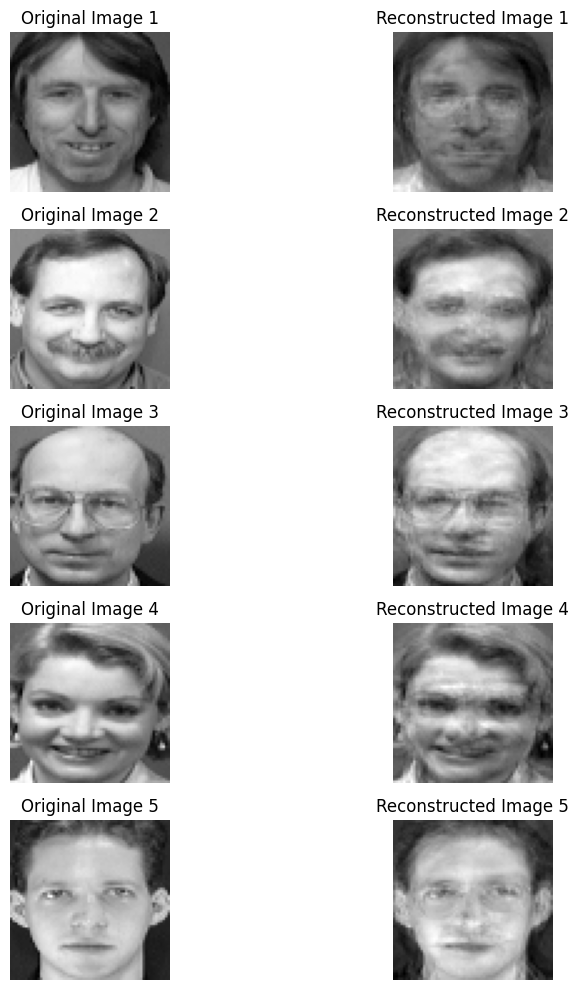

In [6]:
import matplotlib.pyplot as plt

# Reconstruct images from reduced representation
reconstructed_data = (Yt @ top_eigenvectors.T) + mean_vector  # Inverse transform
reconstructed_data = reconstructed_data.reshape(-1, *target_size)  # Reshape back to original dimensions

# Display original and reconstructed images
num_images_to_display = 5  # Number of images to display
plt.figure(figsize=(10, num_images_to_display * 2))

for i in range(num_images_to_display):
    # Original Image
    original_image = data_matrix[i].reshape(target_size)

    # Reconstructed Image
    reconstructed_image = reconstructed_data[i]

    # Plot Original Image
    plt.subplot(num_images_to_display, 2, 2 * i + 1)
    plt.imshow(original_image, cmap='gray')
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

    # Plot Reconstructed Image
    plt.subplot(num_images_to_display, 2, 2 * i + 2)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f"Reconstructed Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()
